In [2]:
# 데이터 불러오기
election <- read.csv("../RFile/election_2022.csv")

In [3]:
head(election)
tail(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [4]:
str(election)

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ 시군구  : Factor w/ 226 levels "가평군","강남구",..: 177 178 150 99 29 62 179 100 5 60 ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


In [6]:
summary(election)

       광역시도      시군구       선거인수          투표수      
 경기도    :41   동구   :  6   Min.   :  8141   Min.   :  6653  
 서울특별시:25   중구   :  6   1st Qu.: 47672   1st Qu.: 39216  
 경상북도  :24   서구   :  5   Median :154354   Median :114654  
 경상남도  :22   남구   :  4   Mean   :176570   Mean   :136148  
 전라남도  :22   북구   :  4   3rd Qu.:265099   3rd Qu.:204189  
 강원도    :18   강서구 :  2   Max.   :703896   Max.   :542027  
 (Other)   :96   (Other):221                                    
     이재명           윤석열           심상정     
 Min.   :  1590   Min.   :  2052   Min.   :  109  
 1st Qu.: 17363   1st Qu.: 18223   1st Qu.:  709  
 Median : 48797   Median : 50341   Median : 2618  
 Mean   : 64479   Mean   : 65566   Mean   : 3216  
 3rd Qu.: 99831   3rd Qu.:101950   3rd Qu.: 5041  
 Max.   :285227   Max.   :275155   Max.   :13249  
                                                  

In [9]:
sum(is.na(election))

[1] 0

In [10]:
table(election$광역시도)


        강원도         경기도       경상남도       경상북도     광주광역시 
            18             41             22             24              5 
    대구광역시     대전광역시     부산광역시     서울특별시 세종특별자치시 
             8              5             16             25              1 
    울산광역시     인천광역시       전라남도       전라북도 제주특별자치도 
             5             10             22             15              2 
      충청남도       충청북도 
            16             13 

In [11]:
library(plotrix)

In [51]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



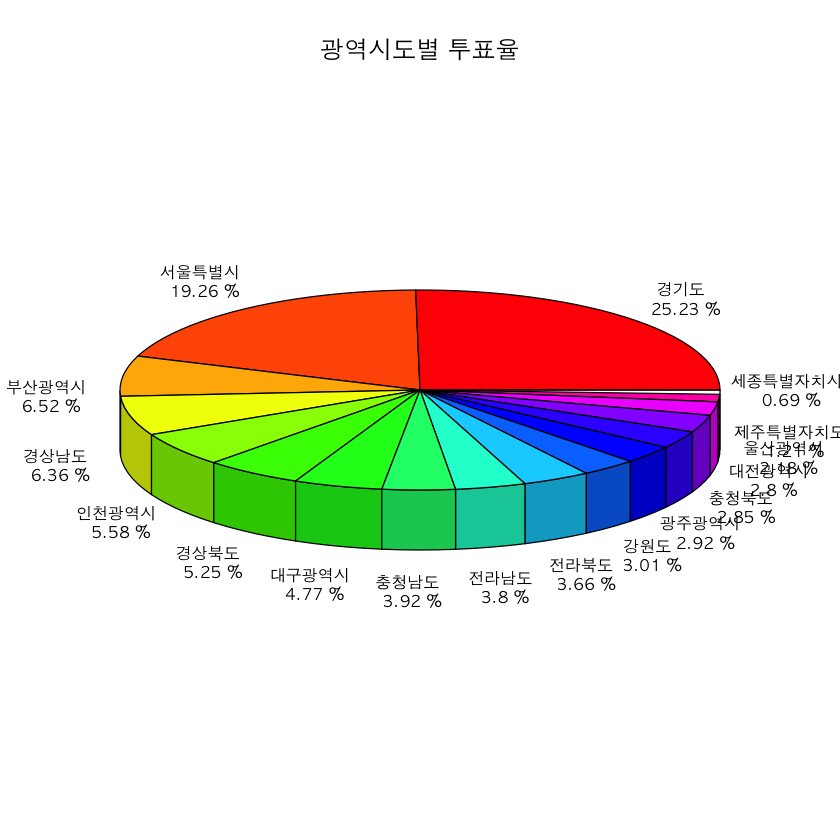

In [107]:
votes <- aggregate(투표수 ~ 광역시도,election,sum)
votes <- arrange(votes,desc(votes$투표수))

options(warn = -1)
투표수 <- votes$투표수
시군구 <- votes$광역시도
label <- paste(시군구,"\n", round(votes$투표수/sum(votes$투표수)*100,2),"%")

par(family = 'AppleGothic')
pie3D(투표수,
      main = "광역시도별 투표율",
      labels = label,
      labelcex = 0.8,
#       radius = 0.3 (파이 작아짐)
    )

In [76]:
election$electionSum <- apply(election[,5:7],1,sum)

In [77]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,98417
서울특별시,중구,111448,84998,38244,42906,2310,83460
서울특별시,용산구,199077,152068,60063,85047,4374,149484
서울특별시,성동구,252087,197240,84411,103880,5365,193656
서울특별시,광진구,303582,235471,109922,113733,7072,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [80]:
# electionRatio <- 투표수 대비 electionSum의 퍼센트 구해서 넣기

election$electionRatio <- election$electionSum/election$투표수*100
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [95]:
# 3명의 후보를 가장 많이 선택한 지역과 가장 적게 선택한 지역 구하기

arrange(election, desc(electionRatio))[1,]
arrange(election, desc(electionRatio))[nrow(election),]

# 2) subset
subset(election, electionRatio == max(election$electionRatio))
subset(election, electionRatio == min(election$electionRatio))

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
248,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


In [99]:
# election_2022_job1.csv 로 저장하기

write.csv(election, "../RFile/election_2022_job1.csv", row.names = F)

In [97]:
election

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565
서울특별시,중랑구,347108,260862,130381,118201,6899,255481,97.93722
서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141
서울특별시,강북구,268974,199448,103333,86540,5245,195118,97.82901
서울특별시,도봉구,281812,216036,106546,99780,5605,211931,98.09985


---

In [108]:
# 각 후보(윤석열, 이재명, 심상정)의 광역시도별 득표율을 3D Pie Chart로 표현하기
# (단, 득표율이 3% 미만인 광역시도는 광역시도 명만 출력하고 퍼센트는 출력하지 않는다./ 퍼센트 단위는 소수 한자리)

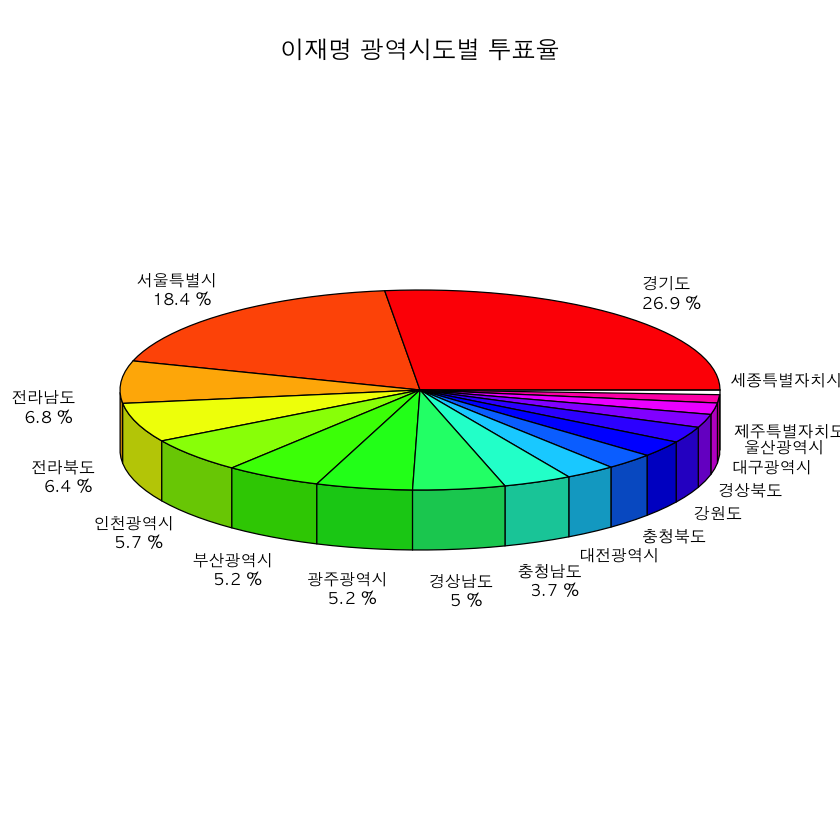

In [152]:
votes <- aggregate(이재명 ~ 광역시도,election,sum)
votes <- arrange(votes,desc(votes$이재명))

options(warn = -1)
투표수 <- votes$이재명
시군구 <- votes$광역시도
label <- paste(시군구,"\n", ifelse(votes$이재명/sum(votes$이재명)*100 >=3 ,paste(round(votes$이재명/sum(votes$이재명)*100,1),"%"),""))

par(family = 'AppleGothic')
pie3D(투표수,
      main = "이재명 광역시도별 투표율",
      labels = label,
      labelcex = 0.8,
#       radius = 0.3 (파이 작아짐)
    )

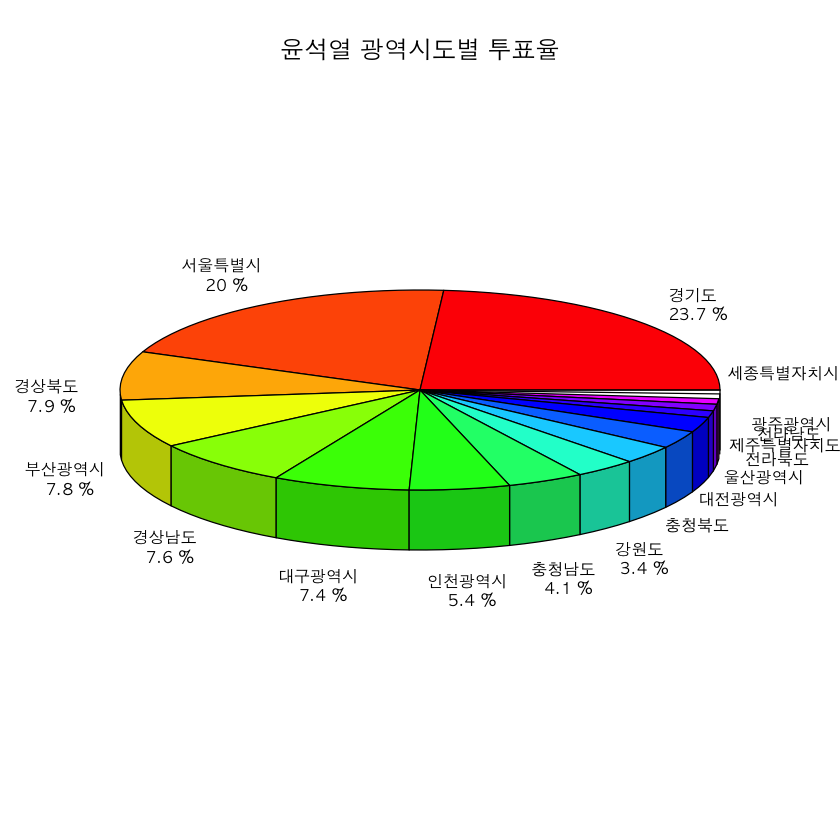

In [297]:
votes <- aggregate(윤석열 ~ 광역시도,election,sum)
votes <- arrange(votes,desc(votes$윤석열))

options(warn = -1)
투표수 <- votes$윤석열
시군구 <- votes$광역시도
label <- paste(시군구,"\n", ifelse(votes$윤석열/sum(votes$윤석열)*100 >=3 ,paste(round(votes$윤석열/sum(votes$윤석열)*100,1),"%"),""))

par(family = 'AppleGothic')
pie3D(투표수,
      main = "윤석열 광역시도별 투표율",
      labels = label,
      labelcex = 0.8,
#       radius = 0.3 (파이 작아짐)
    )

In [176]:
# 수도권(경기도, 서울, 인천)의 투표인구수의 퍼센트?
votes <- aggregate(투표수 ~ 광역시도,election,sum)
votes <- arrange(votes,desc(votes$투표수))

sum(votes$투표수[c(1,2,5)])/sum(votes$투표수)*100

[1] 50.06473

---
### 윤석열 후보의 서울 득표 Top5만 득표율로 표시하고 나머지 지역은 기타로 합치기

In [237]:
# 서울 특별시 Data만 발췌하기
#subset(election, 광역시도 == '서울특별시')

election_seoul <- election[election$광역시도=="서울특별시",]
election_seoul_윤석열 <- arrange(election_seoul, desc(윤석열))[,c(2,6)]
head(election_seoul_윤석열)

시군구,윤석열
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
강동구,160593


In [242]:
# Ratio 구하기
election_seoul_윤석열_ratio <- 
        round(c(election_seoul_윤석열[1:5, 2],sum(election_seoul_윤석열[-c(1:5),2]))/
              sum(election_seoul_윤석열$윤석열) * 100,2)


election_seoul_윤석열_ratio

[1]  7.84  7.25  5.58  5.51  5.02 68.81

In [247]:
# Label 만들기
election_seoul_윤석열_label <-
        c(as.character(election_seoul_윤석열$시군구[1:5]), "기타")

election_seoul_윤석열_label

[1] "송파구" "강남구" "강서구" "서초구" "노원구" "기타"

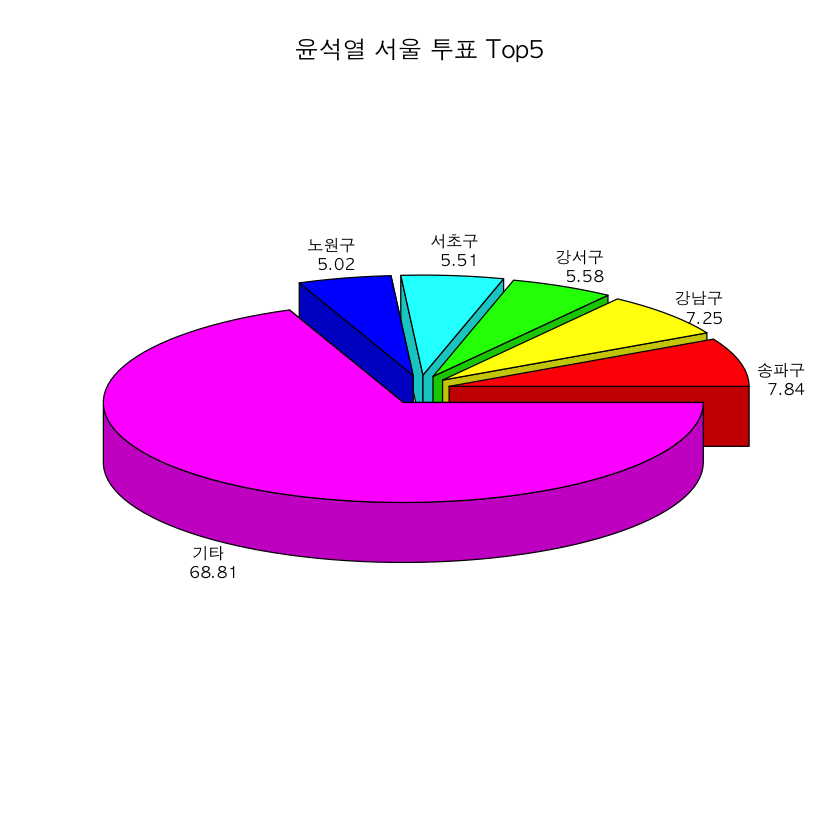

In [250]:


options(warn = -1)
ratio <- election_seoul_윤석열_ratio
시군구 <- election_seoul_윤석열_label
label <- paste(시군구,"\n", round(ratio,2))

par(family = 'AppleGothic')
pie3D(election_seoul_윤석열_ratio,
      main = "윤석열 서울 투표 Top5",
      labels = label,
      labelcex = 0.8,
      explode = 0.1
    )

In [ ]:
# 대선주자 출생지별 득표울 분석


In [294]:
election_seongbuk <- election[election$시군구=='성북구',]

aaa <-  as.numeric(c(election_seongbuk[,5:7],election_seongbuk[,4]-sum(election_seongbuk[,5:7])))
aaa
# election_seongbuk$투표수-election_seongbuk$electionSum




[1] 142702 135044   8952   5489

In [295]:
election_seongbuk_ratio <- c(aaa)/sum(c(aaa))*100
election_seongbuk_label <- c('이재명','윤석열','심상정','기타')

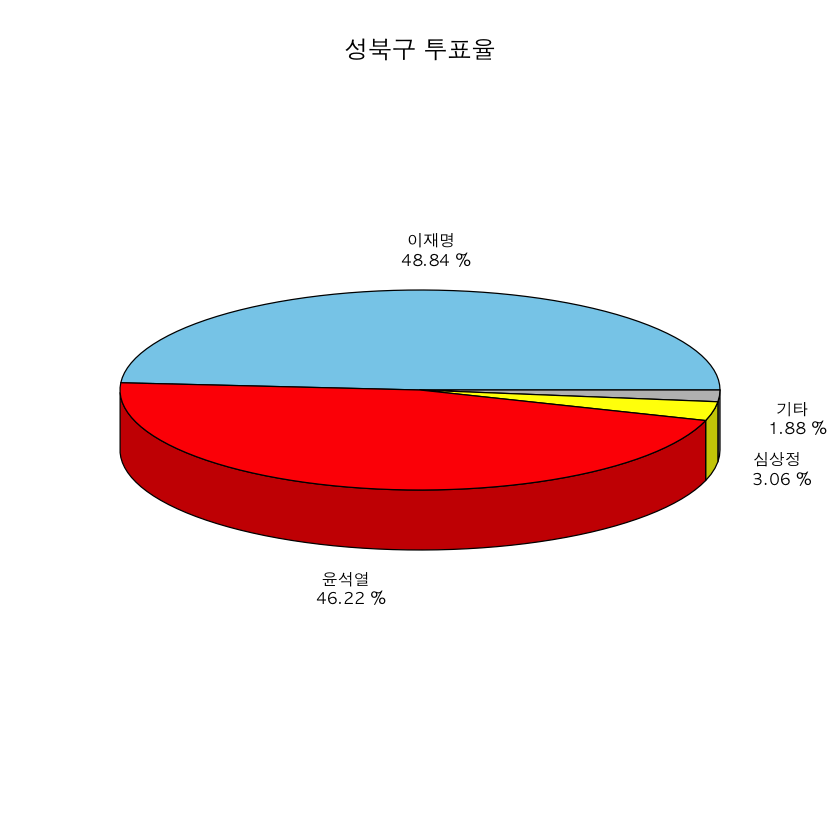

In [299]:


options(warn = -1)
ratio <- election_seongbuk_ratio
시군구 <- election_seongbuk_label
label <- paste(시군구,"\n", round(ratio,2),"%")

par(family = 'AppleGothic')
pie3D(election_seongbuk_ratio,
      main = "성북구 투표율",
      labels = label,
      labelcex = 0.8,
      col = c("sky blue",'red','yellow','grey')

    )